In [85]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [106]:
player1 = pd.read_excel('D.Rice.xlsx')
player2 = pd.read_excel('M.Caicedo.xlsx')
player3 = pd.read_excel('Rodri.xlsx')

In [107]:
def rename_columns(df):
    rename_dict = {
        'Unnamed: 6': 'Successful actions',
        'Total actions / successful': 'Total actions',
        'Unnamed: 10': 'Shots on Target',
        'Shots / on target': 'Shots',
        'Unnamed: 13': 'Passes Accurate',
        'Passes / accurate': 'Passes',
        'Unnamed: 15': 'Long Passes Accurate',
        'Long passes / accurate': 'Long Passes',
        'Unnamed: 17': 'Crosses Accurate',
        'Crosses / accurate': 'Crosses',
        'Unnamed: 19': 'Dribbles Successful',
        'Dribbles / successful': 'Dribbles',
        'Unnamed: 21': 'Duels Won',
        'Duels / won': 'Duels',
        'Unnamed: 23': 'Aerial Duels Won',
        'Aerial duels / won': 'Aerial Duels',
        'Unnamed: 26': 'Losses Own Half',
        'Losses / own half': 'Losses',
        'Unnamed: 28': 'Recoveries opp. half',
        'Recoveries / opp. half': 'Recoveries'
    }
    return df.rename(columns=rename_dict)

player1 = rename_columns(player1)
player2 = rename_columns(player2)
player3 = rename_columns(player3)

In [108]:
player1_avg = (player1.iloc[:, 5:29].sum() / (player1['Minutes played'].sum() / 90)).round(2)
player2_avg = (player2.iloc[:, 5:29].sum() / (player2['Minutes played'].sum() / 90)).round(2)
player3_avg = (player3.iloc[:, 5:29].sum() / (player3['Minutes played'].sum() / 90)).round(2)

In [109]:
name1 = "D. Rice"
name2 = "M. Caicedo"
name3 = "Rodri"
comparison_df = pd.DataFrame({
    name3: player3_avg,
    name1: player1_avg,
    name2: player2_avg
})
display(comparison_df)

,Rodri,D. Rice,M. Caicedo
Total actions,120.42,75.60,80.40
Successful actions,100.10,58.48,60.67
Goals,0.22,0.17,0.03
Assists,0.19,0.22,0.06
Shots,1.68,1.37,0.36
Shots on Target,0.61,0.50,0.11
xG,0.16,0.10,0.01
Passes,95.19,53.71,55.83
Passes Accurate,88.81,49.34,50.71
Long Passes,8.88,3.22,3.67


In [114]:
combined_data = {
    'Actions Successful/Total': [
        f"{comparison_df.loc['Successful actions', name3]} / {comparison_df.loc['Total actions', name3]} ({(comparison_df.loc['Successful actions', name3] / comparison_df.loc['Total actions', name3] * 100):.0f}%)",
        f"{comparison_df.loc['Successful actions', name1]} / {comparison_df.loc['Total actions', name1]} ({(comparison_df.loc['Successful actions', name1] / comparison_df.loc['Total actions', name1] * 100):.0f}%)",
        f"{comparison_df.loc['Successful actions', name2]} / {comparison_df.loc['Total actions', name2]} ({(comparison_df.loc['Successful actions', name2] / comparison_df.loc['Total actions', name2] * 100):.0f}%)"
    ],
    'Goals': [comparison_df.loc['Goals', name3], comparison_df.loc['Goals', name1], comparison_df.loc['Goals', name2]],
    'Assists': [comparison_df.loc['Assists', name3], comparison_df.loc['Assists', name1], comparison_df.loc['Assists', name2]],
    'Shot On Target/Attempt': [
        f"{comparison_df.loc['Shots on Target', name3]} / {comparison_df.loc['Shots', name3]} ({(comparison_df.loc['Shots on Target', name3] / comparison_df.loc['Shots', name3] * 100):.0f}%)",
        f"{comparison_df.loc['Shots on Target', name1]} / {comparison_df.loc['Shots', name1]} ({(comparison_df.loc['Shots on Target', name1] / comparison_df.loc['Shots', name1] * 100):.0f}%)",
        f"{comparison_df.loc['Shots on Target', name2]} / {comparison_df.loc['Shots', name2]} ({(comparison_df.loc['Shots on Target', name2] / comparison_df.loc['Shots', name2] * 100):.0f}%)"
    ],
    'xG': [comparison_df.loc['xG', name3], comparison_df.loc['xG', name1], comparison_df.loc['xG', name2]],
    'Passes Successful/Attempted': [
        f"{comparison_df.loc['Passes Accurate', name3]} / {comparison_df.loc['Passes', name3]} ({(comparison_df.loc['Passes Accurate', name3] / comparison_df.loc['Passes', name3] * 100):.0f}%)",
        f"{comparison_df.loc['Passes Accurate', name1]} / {comparison_df.loc['Passes', name1]} ({(comparison_df.loc['Passes Accurate', name1] / comparison_df.loc['Passes', name1] * 100):.0f}%)",
        f"{comparison_df.loc['Passes Accurate', name2]} / {comparison_df.loc['Passes', name2]} ({(comparison_df.loc['Passes Accurate', name2] / comparison_df.loc['Passes', name2] * 100):.0f}%)"
    ],
    'Long Passes Successful/Attempted': [
        f"{comparison_df.loc['Long Passes Accurate', name3]} / {comparison_df.loc['Long Passes', name3]} ({(comparison_df.loc['Long Passes Accurate', name3] / comparison_df.loc['Long Passes', name3] * 100):.0f}%)",
        f"{comparison_df.loc['Long Passes Accurate', name1]} / {comparison_df.loc['Long Passes', name1]} ({(comparison_df.loc['Long Passes Accurate', name1] / comparison_df.loc['Long Passes', name1] * 100):.0f}%)",
        f"{comparison_df.loc['Long Passes Accurate', name2]} / {comparison_df.loc['Long Passes', name2]} ({(comparison_df.loc['Long Passes Accurate', name2] / comparison_df.loc['Long Passes', name2] * 100):.0f}%)"
    ],
    'Crosses Successful/Attempted': [
        f"{comparison_df.loc['Crosses Accurate', name3]} / {comparison_df.loc['Crosses', name3]} ({(comparison_df.loc['Crosses Accurate', name3] / comparison_df.loc['Crosses', name3] * 100):.0f}%)",
        f"{comparison_df.loc['Crosses Accurate', name1]} / {comparison_df.loc['Crosses', name1]} ({(comparison_df.loc['Crosses Accurate', name1] / comparison_df.loc['Crosses', name1] * 100):.0f}%)",
        f"{comparison_df.loc['Crosses Accurate', name2]} / {comparison_df.loc['Crosses', name2]} ({(comparison_df.loc['Crosses Accurate', name2] / comparison_df.loc['Crosses', name2] * 100):.0f}%)"
    ],
    'Dribbles Successful/Attempted': [
        f"{comparison_df.loc['Dribbles Successful', name3]} / {comparison_df.loc['Dribbles', name3]} ({(comparison_df.loc['Dribbles Successful', name3] / comparison_df.loc['Dribbles', name3] * 100):.0f}%)",
        f"{comparison_df.loc['Dribbles Successful', name1]} / {comparison_df.loc['Dribbles', name1]} ({(comparison_df.loc['Dribbles Successful', name1] / comparison_df.loc['Dribbles', name1] * 100):.0f}%)",
        f"{comparison_df.loc['Dribbles Successful', name2]} / {comparison_df.loc['Dribbles', name2]} ({(comparison_df.loc['Dribbles Successful', name2] / comparison_df.loc['Dribbles', name2] * 100):.0f}%)"
    ],
    'Duels Won/Attempted': [
        f"{comparison_df.loc['Duels Won', name3]} / {comparison_df.loc['Duels', name3]} ({(comparison_df.loc['Duels Won', name3] / comparison_df.loc['Duels', name3] * 100):.0f}%)",
        f"{comparison_df.loc['Duels Won', name1]} / {comparison_df.loc['Duels', name1]} ({(comparison_df.loc['Duels Won', name1] / comparison_df.loc['Duels', name1] * 100):.0f}%)",
        f"{comparison_df.loc['Duels Won', name2]} / {comparison_df.loc['Duels', name2]} ({(comparison_df.loc['Duels Won', name2] / comparison_df.loc['Duels', name2] * 100):.0f}%)"
    ],
    'Aerial Duels Won/Attempted': [
        f"{comparison_df.loc['Aerial Duels Won', name3]} / {comparison_df.loc['Aerial Duels', name3]} ({(comparison_df.loc['Aerial Duels Won', name3] / comparison_df.loc['Aerial Duels', name3] * 100):.0f}%)",
        f"{comparison_df.loc['Aerial Duels Won', name1]} / {comparison_df.loc['Aerial Duels', name1]} ({(comparison_df.loc['Aerial Duels Won', name1] / comparison_df.loc['Aerial Duels', name1] * 100):.0f}%)",
        f"{comparison_df.loc['Aerial Duels Won', name2]} / {comparison_df.loc['Aerial Duels', name2]} ({(comparison_df.loc['Aerial Duels Won', name2] / comparison_df.loc['Aerial Duels', name2] * 100):.0f}%)"
    ],
    'Interceptions': [comparison_df.loc['Interceptions', name3], comparison_df.loc['Interceptions', name1], comparison_df.loc['Interceptions', name2]],
    'Losses Own Half/Total': [
        f"{comparison_df.loc['Losses Own Half', name3]} / {comparison_df.loc['Losses', name3]} ({(comparison_df.loc['Losses Own Half', name3] / comparison_df.loc['Losses', name3] * 100):.0f}%)",
        f"{comparison_df.loc['Losses Own Half', name1]} / {comparison_df.loc['Losses', name1]} ({(comparison_df.loc['Losses Own Half', name1] / comparison_df.loc['Losses', name1] * 100):.0f}%)",
        f"{comparison_df.loc['Losses Own Half', name2]} / {comparison_df.loc['Losses', name2]} ({(comparison_df.loc['Losses Own Half', name2] / comparison_df.loc['Losses', name2] * 100):.0f}%)"
    ],
    'Recoveries Ppp. Half/Total': [
        f"{comparison_df.loc['Recoveries opp. half', name3]} / {comparison_df.loc['Recoveries', name3]} ({(comparison_df.loc['Recoveries opp. half', name3] / comparison_df.loc['Recoveries', name3] * 100):.0f}%)",
        f"{comparison_df.loc['Recoveries opp. half', name1]} / {comparison_df.loc['Recoveries', name1]} ({(comparison_df.loc['Recoveries opp. half', name1] / comparison_df.loc['Recoveries', name1] * 100):.0f}%)",
        f"{comparison_df.loc['Recoveries opp. half', name2]} / {comparison_df.loc['Recoveries', name2]} ({(comparison_df.loc['Recoveries opp. half', name2] / comparison_df.loc['Recoveries', name2] * 100):.0f}%)"
    ]
}

new_comparison_df = pd.DataFrame(combined_data, index=[name3, name1, name2])

new_comparison_df = new_comparison_df.T

display(new_comparison_df)


,Rodri,D. Rice,M. Caicedo
Actions Successful/Total,100.1 / 120.42 (83%),58.48 / 75.6 (77%),60.67 / 80.4 (75%)
Goals,0.22,0.17,0.03
Assists,0.19,0.22,0.06
Shot On Target/Attempt,0.61 / 1.68 (36%),0.5 / 1.37 (36%),0.11 / 0.36 (31%)
xG,0.16,0.1,0.01
Passes Successful/Attempted,88.81 / 95.19 (93%),49.34 / 53.71 (92%),50.71 / 55.83 (91%)
Long Passes Successful/Attempted,6.95 / 8.88 (78%),1.9 / 3.22 (59%),2.38 / 3.67 (65%)
Crosses Successful/Attempted,0.14 / 0.44 (32%),0.15 / 0.55 (27%),0.06 / 0.31 (19%)
Dribbles Successful/Attempted,1.24 / 1.93 (64%),0.95 / 1.65 (58%),1.01 / 1.68 (60%)
Duels Won/Attempted,8.91 / 16.49 (54%),7.02 / 13.55 (52%),9.01 / 16.96 (53%)


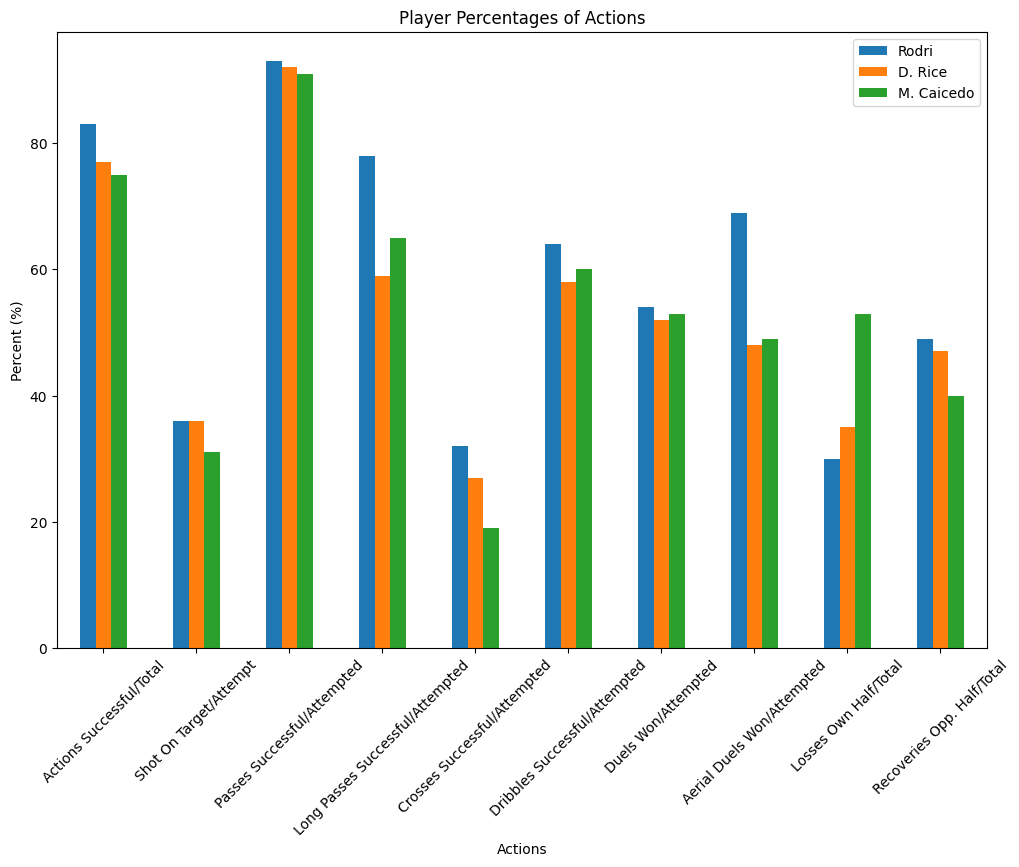

In [139]:
import matplotlib.pyplot as plt
import re

def getPercent(value):
    match = re.search(r'\((\d+)%\)', value)
    return int(match.group(1)) if match else 0

percents = {
    'Actions Successful/Total': [getPercent(val) for val in combined_data['Actions Successful/Total']],
    'Shot On Target/Attempt': [getPercent(val) for val in combined_data['Shot On Target/Attempt']],
    'Passes Successful/Attempted': [getPercent(val) for val in combined_data['Passes Successful/Attempted']],
    'Long Passes Successful/Attempted': [getPercent(val) for val in combined_data['Long Passes Successful/Attempted']],
    'Crosses Successful/Attempted': [getPercent(val) for val in combined_data['Crosses Successful/Attempted']],
    'Dribbles Successful/Attempted': [getPercent(val) for val in combined_data['Dribbles Successful/Attempted']],
    'Duels Won/Attempted': [getPercent(val) for val in combined_data['Duels Won/Attempted']],
    'Aerial Duels Won/Attempted': [getPercent(val) for val in combined_data['Aerial Duels Won/Attempted']],
    'Losses Own Half/Total': [getPercent(val) for val in combined_data['Losses Own Half/Total']],
    'Recoveries Opp. Half/Total': [getPercent(val) for val in combined_data['Recoveries Ppp. Half/Total']]
}

percent_df = pd.DataFrame(percents, index=[name3, name1, name2])

percent_df = percent_df.T

percent_df.plot(kind='bar', figsize=(12, 8))
plt.title('Player Percentages of Actions')
plt.ylabel('Percent (%)')
plt.xlabel('Actions')
plt.xticks(rotation=45)
plt.legend()

plt.show()
